Main Questions:

- Which U.S. state has the best market conditions for a new restaurant or takeout business?

- What type of restaurant (eg., fast food, casual dining, fine dining, ethnic cuisine) has the highestr success rate?

- What demographic, economic and consumer behavior factors influence restaurant success?

US Population Data (By State) ~ 2020 to 2024

In [4]:
#importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import json
from serpapi import GoogleSearch
from tqdm import tqdm

In [59]:
#Loading the dataset
df = pd.read_csv('Datasets/Population Data (2020-2024).csv')

df.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
0,40,3,6,1,Alabama,5025369,5033094,5049196,5076181,5117673,...,2.549575,3.068113,4.993905,5.575299,5.875305,5.066094,5.351760,7.186103,8.424880,8.134207
1,40,4,9,2,Alaska,733395,733017,734420,734442,736510,...,4.610620,5.456972,-4.685721,-7.940841,-6.643317,-5.111594,-3.495891,-4.103857,-2.032697,0.345378
2,40,4,8,4,Arizona,7158110,7187135,7274078,7377566,7473027,...,7.106383,8.566488,11.557122,9.390073,4.741629,4.636473,12.665881,13.950789,11.848012,13.202961
3,40,3,7,5,Arkansas,3011553,3014546,3026870,3047704,3069463,...,1.623627,1.998111,5.257046,6.213769,5.826553,4.373303,5.702968,8.247492,7.450181,6.371414
4,40,4,9,6,California,39555674,39521958,39142565,39142414,39198693,...,7.472986,9.183701,-12.142348,-8.602084,-8.782848,-6.093734,-11.020444,-2.599579,-1.309862,3.089967


In [60]:
#Dropping unnecessary rows

#df = df.drop(index=list(range(0, 13)))
#df = df.drop(index = 13)

df.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,POPESTIMATE2023,...,RINTERNATIONALMIG2023,RINTERNATIONALMIG2024,RDOMESTICMIG2021,RDOMESTICMIG2022,RDOMESTICMIG2023,RDOMESTICMIG2024,RNETMIG2021,RNETMIG2022,RNETMIG2023,RNETMIG2024
0,40,3,6,1,Alabama,5025369,5033094,5049196,5076181,5117673,...,2.549575,3.068113,4.993905,5.575299,5.875305,5.066094,5.351760,7.186103,8.424880,8.134207
1,40,4,9,2,Alaska,733395,733017,734420,734442,736510,...,4.610620,5.456972,-4.685721,-7.940841,-6.643317,-5.111594,-3.495891,-4.103857,-2.032697,0.345378
2,40,4,8,4,Arizona,7158110,7187135,7274078,7377566,7473027,...,7.106383,8.566488,11.557122,9.390073,4.741629,4.636473,12.665881,13.950789,11.848012,13.202961
3,40,3,7,5,Arkansas,3011553,3014546,3026870,3047704,3069463,...,1.623627,1.998111,5.257046,6.213769,5.826553,4.373303,5.702968,8.247492,7.450181,6.371414
4,40,4,9,6,California,39555674,39521958,39142565,39142414,39198693,...,7.472986,9.183701,-12.142348,-8.602084,-8.782848,-6.093734,-11.020444,-2.599579,-1.309862,3.089967


Below, we can see the top 5 states with the highgest population in the U.S.

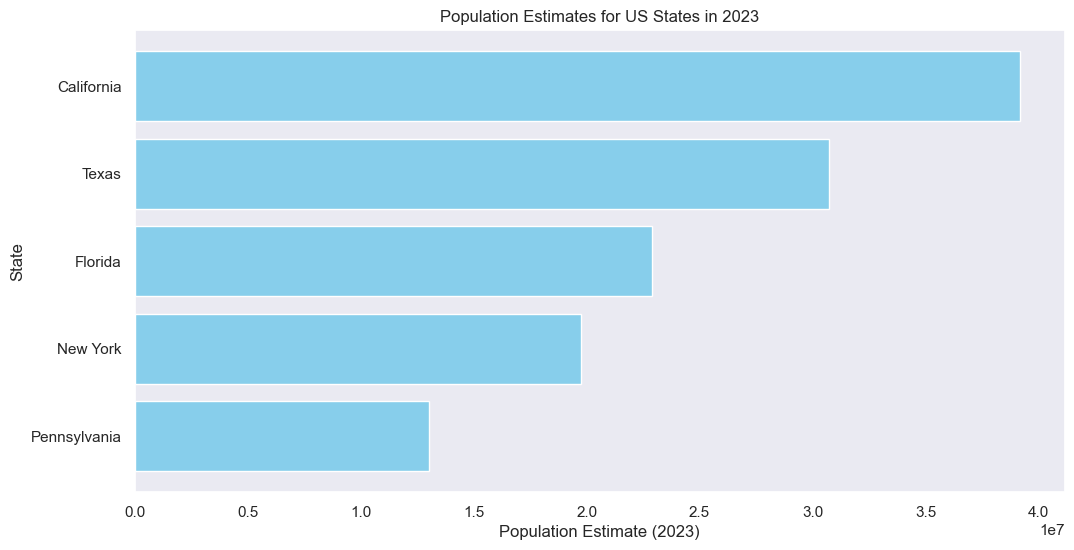

In [61]:
#Plotting the population by state and selecting the top 5 states

#Extracting state names and population estimates for 2024
states = df["NAME"]
pop_est = df["POPESTIMATE2023"]
top_states = pop_est.nlargest(5).index #index of top 5 states
toppop_est = pop_est[top_states] #Population values of top 5 states
top_states_names = states[top_states] #State names

#plot the data
plt.figure(figsize=(12, 6))
plt.barh(top_states_names, toppop_est, color="skyblue")
plt.xlabel("Population Estimate (2023)")
plt.ylabel("State")
plt.title("Population Estimates for US States in 2023")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

Below, we will find the income levels of the top 3 states with the highest population

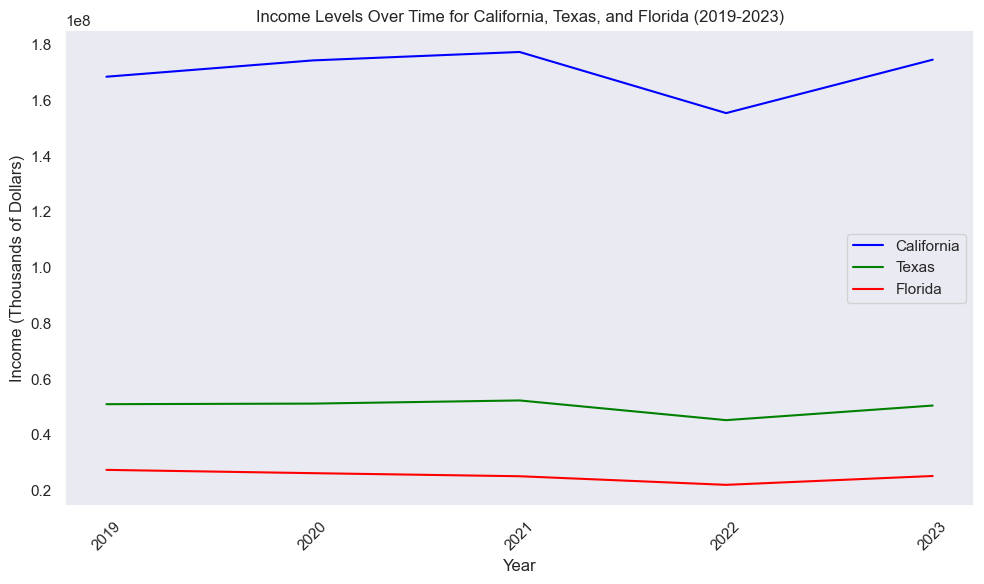

In [27]:
# Load the dataset for all three states (replace with your file paths)
california_df = pd.read_csv('Datasets/SAINC70_CA_2000_2023.csv')
texas_df = pd.read_csv('Datasets/SAINC70_TX_2000_2023.csv')
florida_df = pd.read_csv('Datasets/SAINC70_FL_2000_2023.csv')

# Define the years and categories you are interested in
years = ['2019', '2020', '2021', '2022', '2023']
categories = ['Current receipts, accrual basis ']

# Create a plot
plt.figure(figsize=(10,6))

# Filter and plot data for California
california_data = california_df[california_df["Description"].isin(categories)]
for index, row in california_data.iterrows():
    plt.plot(years, row[years].values, label="California", color='blue')

# Filter and plot data for Texas
texas_data = texas_df[texas_df["Description"].isin(categories)]
for index, row in texas_data.iterrows():
    plt.plot(years, row[years].values, label="Texas", color='green')

# Filter and plot data for Florida
florida_data = florida_df[florida_df["Description"].isin(categories)]
for index, row in florida_data.iterrows():
    plt.plot(years, row[years].values, label="Florida", color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Income (Thousands of Dollars)')
plt.title('Income Levels Over Time for California, Texas, and Florida (2019-2023)')
plt.legend()

# Adjust the x-ticks for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


Based on the population density and the personal income levels data extracted from the US BEA(Bureau of Economic Analysis), we can say that it would be beneficial to start a food business in California.

In the next step, we will find out which type of restaurant has the most chances of succeeding in California.

In [7]:
#SERP API Key
api_key = os.environ.get("serp_api")

In [41]:
# Define the restaurant types and California cities to search
restaurant_types = ["fast food", "casual dining", "ethnic food", "fine dining"]

# Major California cities to search in
california_cities = [
    "Los Angeles", "San Francisco", "San Diego", "Sacramento", "San Jose",
    "Fresno", "Long Beach", "Oakland", "Bakersfield", "Anaheim",
    "Santa Ana", "Riverside", "Stockton", "Irvine", "Chula Vista"
]


In [ ]:
params = {
    "engine" : "yelp",
    "find_desc" : "casual dining",
    "find_loc" : "Anaheim, California",
    "api_key" : api_key,
    "max_pages" : 2
}

search = GoogleSearch(params)
results = search.get_dict()
results
all_restaurants = []

for restaurant in results.get("organic_results"):
    restaurant_data = {
                    "name": restaurant.get("title", "N/A"),
                    "type": "Casual Dining",
                    "city": "Anaheim",
                    "rating": restaurant.get("rating", "N/A"),
                    "reviews_count": restaurant.get("reviews", "N/A"),
                    "price_range": restaurant.get("price", "N/A"),
                    "link": restaurant.get("link", "N/A"),
                    "categories": [cat.get("title", "") for cat in restaurant.get("categories", [])],
                    "address": restaurant.get("address", "N/A"),
                    "phone": restaurant.get("phone", "N/A")
    }
    all_restaurants.append(restaurant_data)
    
all_restaurants

In [42]:
# Initialize an empty list to store all restaurant data
all_restaurants_data = []

# Loop through each restaurant type and location
for restaurant_type in restaurant_types:
    for city in california_cities:
        # Update the search parameters
        params["find_desc"] = restaurant_type
        params["find_loc"] = f"{city}, California"
        
        # Perform the search
        search = GoogleSearch(params)
        results = search.get_dict()
        
        # Extract restaurant data
        for restaurant in results.get("organic_results", []):
            restaurant_data = {
                "name": restaurant.get("title", "N/A"),
                "type": restaurant_type,
                "city": city,
                "rating": restaurant.get("rating", "N/A"),
                "reviews_count": restaurant.get("reviews", "N/A"),
                "price_range": restaurant.get("price", "N/A"),
                "link": restaurant.get("link", "N/A"),
                "categories": [cat.get("title", "") for cat in restaurant.get("categories", [])],
                "address": restaurant.get("address", "N/A"),
                "phone": restaurant.get("phone", "N/A")
            }
            all_restaurants_data.append(restaurant_data)

# Convert the data into a DataFrame
restaurants_df = pd.DataFrame(all_restaurants_data)

# Export the data to a CSV file
restaurants_df.to_csv("california_restaurants_data.csv", index=False)

print("Data extraction and export completed successfully!")



Data extraction and export completed successfully!


In [ ]:
ca_df = pd.read_csv('Datasets/california_restaurants_data.csv')
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           600 non-null    object 
 1   type           600 non-null    object 
 2   city           600 non-null    object 
 3   rating         600 non-null    float64
 4   reviews_count  600 non-null    int64  
 5   price_range    532 non-null    object 
 6   link           600 non-null    object 
 7   categories     600 non-null    object 
 8   address        0 non-null      float64
 9   phone          584 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 47.0+ KB


In [ ]:
print("The mean rating is", ca_df["rating"].mean())
print("The median rating is", ca_df["rating"].median())

The mean rating is 4.108666666666667
The median rating is 4.3
The average number of reviews are 893.1383333333333
The median number of reviews are 475.0


In [5]:
# Group by restaurant type and calculate average rating & review count
restaurant_type_analysis = ca_df.groupby("type").agg(
    avg_rating=("rating", "mean"),
    avg_reviews=("reviews_count", "mean"),
    count=("name", "count")  # To verify sample size
).sort_values(by=["avg_rating", "avg_reviews"], ascending=[False, False])

# Group by city and calculate the same metrics
city_analysis = ca_df.groupby("city").agg(
    avg_rating=("rating", "mean"),
    avg_reviews=("reviews_count", "mean"),
    count=("name", "count")
).sort_values(by=["avg_rating", "avg_reviews"], ascending=[False, False])

restaurant_type_analysis, city_analysis


(               avg_rating  avg_reviews  count
 type                                         
 ethnic food      4.353333   774.333333    150
 casual dining    4.344000   971.886667    150
 fine dining      4.288667  1123.053333    150
 fast food        3.448667   703.280000    150,
                avg_rating  avg_reviews  count
 city                                         
 San Diego          4.3075     1565.800     40
 Anaheim            4.2775     1369.525     40
 Long Beach         4.2725      869.925     40
 Fresno             4.2175      456.350     40
 San Francisco      4.1550     1107.575     40
 Los Angeles        4.1375     1589.850     40
 Stockton           4.1300      489.900     40
 Santa Ana          4.1225     1097.900     40
 San Jose           4.0600      750.900     40
 Irvine             4.0450      874.250     40
 Riverside          4.0450      705.425     40
 Oakland            4.0325      833.850     40
 Bakersfield        3.9575      420.250     40
 Chula Vista

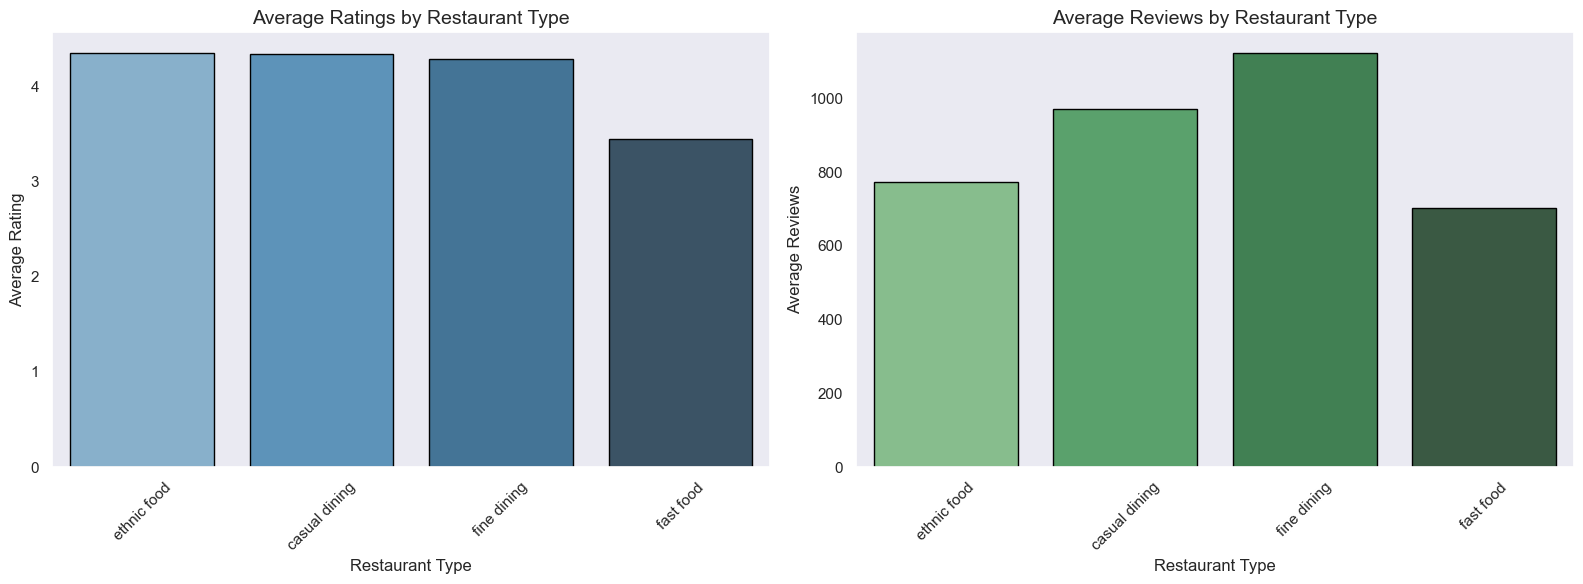

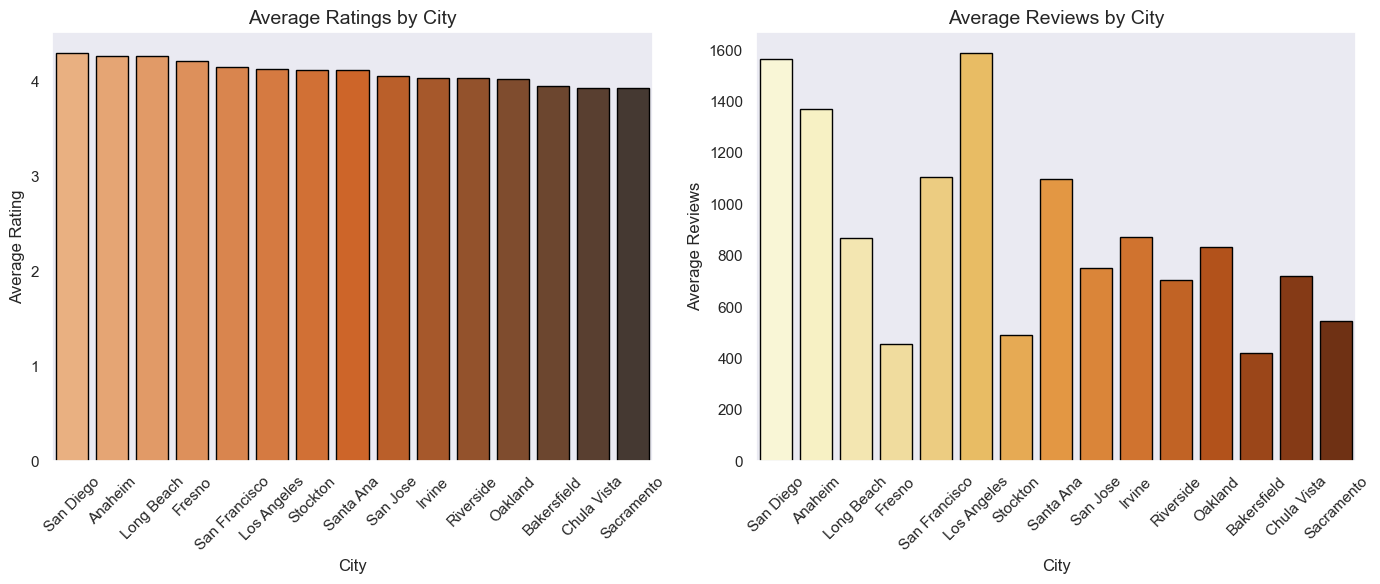

In [16]:
# Set Seaborn style
sns.set_theme(style="dark")

# Visualize average ratings and reviews by restaurant type
plt.figure(figsize=(16, 6))

# Bar plot for average ratings by restaurant type
plt.subplot(1, 2, 1)
sns.barplot(
    x=restaurant_type_analysis.index,
    y=restaurant_type_analysis["avg_rating"],
    hue=restaurant_type_analysis.index, 
    palette="Blues_d",
    edgecolor="black",
    dodge=False  # Ensure bars are not split
)
plt.title("Average Ratings by Restaurant Type", fontsize=14)
plt.ylabel("Average Rating", fontsize=12)
plt.xlabel("Restaurant Type", fontsize=12)
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Remove legend

# Bar plot for average reviews by restaurant type
plt.subplot(1, 2, 2)
sns.barplot(
    x=restaurant_type_analysis.index,
    y=restaurant_type_analysis["avg_reviews"],
    hue=restaurant_type_analysis.index, 
    palette="Greens_d",
    edgecolor="black",
    dodge=False  # Ensure bars are not split
)
plt.title("Average Reviews by Restaurant Type", fontsize=14)
plt.ylabel("Average Reviews", fontsize=12)
plt.xlabel("Restaurant Type", fontsize=12)
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Remove legend

plt.tight_layout()
plt.show()

# Visualize average ratings and reviews by city
plt.figure(figsize=(14, 6))

# Bar plot for average ratings by city
plt.subplot(1, 2, 1)
sns.barplot(
    x=city_analysis.index,
    y=city_analysis["avg_rating"],
    hue=city_analysis.index, 
    palette="Oranges_d",
    edgecolor="black",
    dodge=False  # Ensure bars are not split
)
plt.title("Average Ratings by City", fontsize=14)
plt.ylabel("Average Rating", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Remove legend

# Bar plot for average reviews by city
plt.subplot(1, 2, 2)
sns.barplot(
    x=city_analysis.index,
    y=city_analysis["avg_reviews"],
    hue=city_analysis.index, 
    palette="YlOrBr",
    edgecolor="black",
    dodge=False  # Ensure bars are not split
)
plt.title("Average Reviews by City", fontsize=14)
plt.ylabel("Average Reviews", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Remove legend

plt.tight_layout()
plt.show()

From the exploratory data analysis (EDA), we can see that while find dining has the most number of reviews on average, the higest rating goes to ethnic food category while it also doesn't fall much behind the fine dining and casual dining category in the reviews counts. Therefore, we can say that ethnic food would be the best overall category since it has the higest rating in average and depending on the type of food, it will also serve as a differentiator in the restaurant business and help mitigate competition.

We can also see from the graph that San Diego has the highest average rating and the highest number of average reviews. Therefore, San Diego wins in term of the best rating and high engagement. 

That's why, I have chosen to chosen to open an ethnic food restaurant in San Diego.

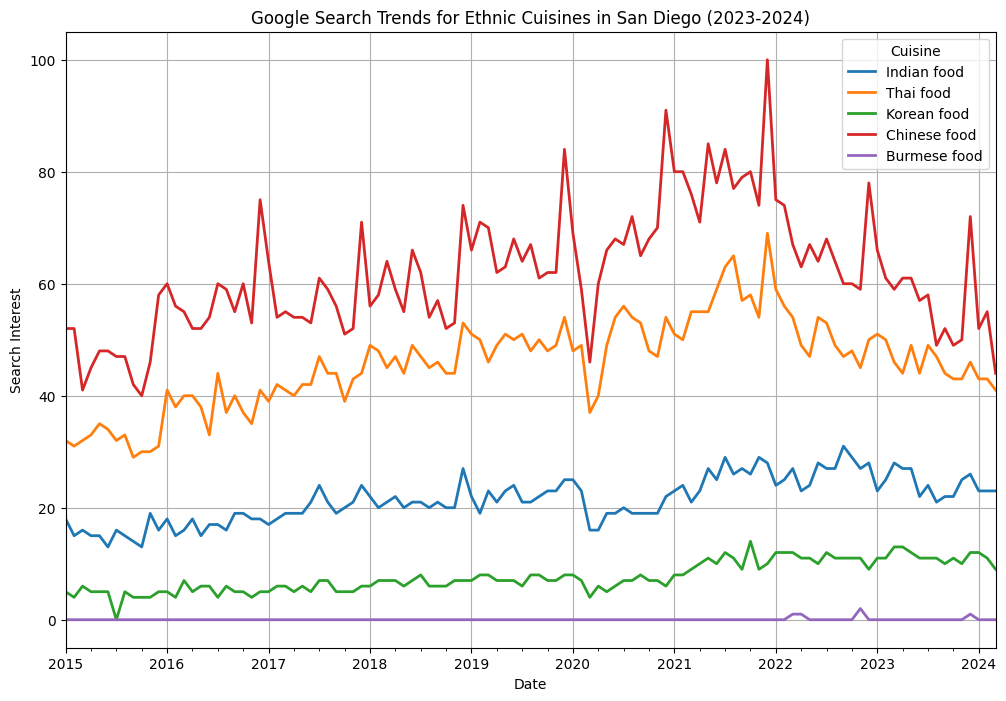

In [42]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Google Trends API
pytrends = TrendReq()

# Define search terms (popular ethnic cuisines)
cuisines = ["Indian food", "Thai food", "Korean food", "Chinese food", "Burmese food"]

# Get trends data for San Diego
pytrends.build_payload(cuisines, geo='US-CA-825', timeframe='2015-01-01 2024-03-01')

# Fetch interest over time
df_trends = pytrends.interest_over_time()
df_trends.drop(columns=['isPartial'], inplace=True)  # Drop unnecessary column

# Plot search trends
df_trends.plot(figsize=(12,8), linewidth=2)
plt.title("Google Search Trends for Ethnic Cuisines in San Diego (2023-2024)")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend(title="Cuisine")
plt.grid()
plt.show()

In [ ]:
# Define search terms (popular ethnic cuisines)
params = {
  "engine": "google_trends",
  "q": "Indian food, Thai food, Burmese food, Chinese food, Korean food",
  "data_type": "TIMESERIES",
  "hl" : "en",
  "geo" : "825",
  "date" :"2015-01-01 2025-01-01",
  "api_key": api_key
}

#Extracting the dictionary file
search = GoogleSearch(params)
results = search.get_dict()
if "interest_over_time" in results:
    interest_over_time = results["interest_over_time"]
else:
    print("Error: 'interest_over_time' key not found in results.")
    interest_over_time = None

#Print to see everything is correct
interest_over_time

{'timeline_data': [{'date': 'Jan 2015',
   'timestamp': '1420070400',
   'values': [{'query': 'Indian food', 'value': '18', 'extracted_value': 18},
    {'query': 'Thai food', 'value': '32', 'extracted_value': 32},
    {'query': 'Burmese food', 'value': '0', 'extracted_value': 0},
    {'query': 'Chinese food', 'value': '52', 'extracted_value': 52},
    {'query': 'Korean food', 'value': '5', 'extracted_value': 5}]},
  {'date': 'Feb 2015',
   'timestamp': '1422748800',
   'values': [{'query': 'Indian food', 'value': '15', 'extracted_value': 15},
    {'query': 'Thai food', 'value': '31', 'extracted_value': 31},
    {'query': 'Burmese food', 'value': '0', 'extracted_value': 0},
    {'query': 'Chinese food', 'value': '52', 'extracted_value': 52},
    {'query': 'Korean food', 'value': '4', 'extracted_value': 4}]},
  {'date': 'Mar 2015',
   'timestamp': '1425168000',
   'values': [{'query': 'Indian food', 'value': '16', 'extracted_value': 16},
    {'query': 'Thai food', 'value': '32', 'extract

In [44]:
# Convert the data into a DataFrame and save it as a CSV file
if interest_over_time:
  timeline_data = interest_over_time.get("timeline_data", [])
  data = []
  for item in timeline_data:
    row = {"date": item.get("date", "N/A")}
    for value in item.get("values", []):
      row[value.get("query", "N/A")] = value.get("value", "N/A")
    data.append(row)
  
  # Create a DataFrame
  trends_df = pd.DataFrame(data)
  
  # Save to CSV
  trends_df.to_csv("google_trends_data.csv", index=False)
  print("Data successfully saved to 'google_trends_data.csv'")
else:
  print("No data available to save.")

Data successfully saved to 'google_trends_data.csv'


Next step : Scrape the trends in Google Search for the chosen city. Use Google Trends API and Uber and DoorDash Menu Scrapes to know the demand